In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv

### Reading CSV data files

In [147]:
#CSV file paths

accident_path = "project_data/accident_df.csv"
accident_location_path = "project_data/accident_location_df.csv"
node_path = "project_data/node_df.csv"
main_csv_path = "project_data/proj_accident_main.csv"


#creating dataframes 
main_df = pd.read_csv(main_csv_path)
node_df = pd.read_csv(node_path)
accident_df = pd.read_csv(accident_path)
accident_location_df = pd.read_csv(accident_location_path)

#remove first column
main_df = main_df.drop(main_df.columns[0], axis=1)
node_df = node_df.drop(node_df.columns[0], axis=1)
accident_df = accident_df.drop(accident_df.columns[0], axis=1)
accident_location_df = accident_location_df.drop(accident_location_df.columns[0], axis=1)

#remove unwanted columns  


### creating dataframes for each year's accidents

In [151]:
#converting accidentdate column to datetime format, for easier search
main_df["ACCIDENTDATE"] = pd.to_datetime(main_df["ACCIDENTDATE"])
#main_df["Year"] = main_df["ACCIDENTDATE"].dt.year

#creating dataframes for each year's accidents
main_2016_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2016]
main_2017_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2017]
main_2018_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2018]
main_2019_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2019]
main_2020_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2020]

#sorting by date code
main_2016_df.sort_values(by=["ACCIDENTDATE"])
main_2017_df.sort_values(by=["ACCIDENTDATE"])
main_2018_df.sort_values(by=["ACCIDENTDATE"])
main_2019_df.sort_values(by=["ACCIDENTDATE"])
main_2020_df.sort_values(by=["ACCIDENTDATE"])


# node dataframes based on year
node_2016_df = node_df[node_df["ACCIDENT_NO"].isin(main_2016_df["ACCIDENT_NO"])]
node_2017_df = node_df[node_df["ACCIDENT_NO"].isin(main_2017_df["ACCIDENT_NO"])]
node_2018_df = node_df[node_df["ACCIDENT_NO"].isin(main_2018_df["ACCIDENT_NO"])]
node_2019_df = node_df[node_df["ACCIDENT_NO"].isin(main_2019_df["ACCIDENT_NO"])]
node_2020_df = node_df[node_df["ACCIDENT_NO"].isin(main_2020_df["ACCIDENT_NO"])]

# accident location dataframes based on year

accident_location_2016_df = accident_location_df[accident_location_df["ACCIDENT_NO"].isin(main_2016_df["ACCIDENT_NO"])]
accident_location_2017_df = accident_location_df[accident_location_df["ACCIDENT_NO"].isin(main_2017_df["ACCIDENT_NO"])]
accident_location_2018_df = accident_location_df[accident_location_df["ACCIDENT_NO"].isin(main_2018_df["ACCIDENT_NO"])]
accident_location_2019_df = accident_location_df[accident_location_df["ACCIDENT_NO"].isin(main_2019_df["ACCIDENT_NO"])]
accident_location_2020_df = accident_location_df[accident_location_df["ACCIDENT_NO"].isin(main_2020_df["ACCIDENT_NO"])]

# accident  dataframes based on year
accident_2016_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2016_df["ACCIDENT_NO"])]
accident_2017_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2017_df["ACCIDENT_NO"])]
accident_2018_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2018_df["ACCIDENT_NO"])]
accident_2019_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2019_df["ACCIDENT_NO"])]
accident_2020_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2020_df["ACCIDENT_NO"])]


In [ ]:
count1 = main_2016_df["ACCIDENT_NO"].count()
node_count1 = accident_location_2016_df["ACCIDENT_NO"].nunique()

count2 = main_2017_df["ACCIDENT_NO"].count()
node_count2 = accident_location_2017_df["ACCIDENT_NO"].nunique()

count3 = main_2018_df["ACCIDENT_NO"].count()
node_count3 = node_2018_df["ACCIDENT_NO"].nunique()

count4 = main_2019_df["ACCIDENT_NO"].count()
node_count4 = node_2019_df["ACCIDENT_NO"].nunique()

count5 = main_2020_df["ACCIDENT_NO"].count()
node_count5 = accident_2020_df["ACCIDENT_NO"].nunique()


print(f" Number of accidents in 2016: {count1} ")
print(f" Number of nodes in 2016: {node_count1} ")


print(f" Number of accidents in 2017: {count2} ")
print(f" Number of nodes in 2017: {node_count2} ")

print(f" Number of accidents in 2018: {count3} ")
print(f" Number of nodes in 2018: {node_count3} ")


print(f" Number of accidents in 2019: {count4} ")
print(f" Number of nodes in 2019: {node_count4} ")

print(f" Number of accidents in 2020: {count5} ")
print(f" Number of nodes in 2020: {node_count5} ")


# postcode analysis


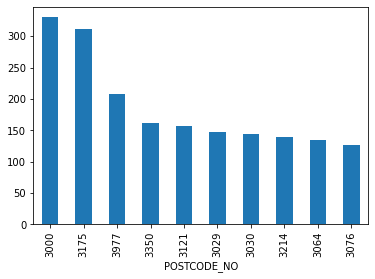

POSTCODE_NO
3000    330
3175    311
3977    207
3350    161
3121    156
Name: ACCIDENT_NO, dtype: int64

In [213]:


#postcodes_2016 = node_2016_df.groupby("POSTCODE_NO", as_index=True)["ACCIDENT_NO"].count()
top_postcodes_2016 = node_2016_df.groupby("POSTCODE_NO", as_index=True)["ACCIDENT_NO"].count()

node_2016_df.groupby("POSTCODE_NO", as_index=True)["ACCIDENT_NO"].count().nlargest(10).plot(kind = "bar")


plt.show()

top_postcodes_2016.nlargest(5)

### postcode analysis

In [153]:
print(node_2016_df["POSTCODE_NO"].value_counts().head(5))
print(node_2017_df["POSTCODE_NO"].value_counts().head(5))
print(node_2018_df["POSTCODE_NO"].value_counts().head(5))
print(node_2019_df["POSTCODE_NO"].value_counts().head(5))
print(node_2020_df["POSTCODE_NO"].value_counts().head(5))



3000    330
3175    311
3977    207
3350    161
3121    156
Name: POSTCODE_NO, dtype: int64
3000    291
3175    238
3350    174
3030    171
3977    171
Name: POSTCODE_NO, dtype: int64
3000    286
3175    212
3977    170
3029    162
3030    146
Name: POSTCODE_NO, dtype: int64
3175    271
3000    271
3977    212
3029    193
3030    193
Name: POSTCODE_NO, dtype: int64
3175    114
3030    103
3029     97
3000     92
3350     73
Name: POSTCODE_NO, dtype: int64


# Year data

